# Introduction to Linear Algebra

Let's finding eigenvalues (i.e., energy spectrum) and eigenfunctions of the time-independent Schrodinger equation (utilizing [atomic units](https://en.wikipedia.org/wiki/Hartree_atomic_units) where $\hbar=m=1$)
\begin{align}\label{ExactHamiltonianCoordinateRep}
	\left[ -\frac{1}{2}\frac{d^2}{d x^2} + U(x) \right] \psi(x) = E \psi(x).
\end{align}

According to the **forward finite difference** approximation,  the derivative of a function $f(x)$ is approximated by

\begin{align}
	f'(x) &\approx [ f(x+\Delta x) - f(x) ] / \Delta x = \left[ f(x) + f'(x) \Delta x + O\left(\Delta x^2 \right) - f(x) \right] / \Delta x
	= f'(x) + O\left( \Delta x \right) \Longrightarrow \label{EqForwardDiffApprox} \\
	f''(x) &\approx [ f'(x+\Delta x) - f'(x) ] / \Delta x  = [ f(x+2\Delta x) - 2f(x + \Delta x) + f(x)] / \Delta x^2 + O\left( \Delta x \right). 
\end{align}

The discretized Schrodinger Eq. reads
\begin{align}\label{ForwardDiffHamiltonianDiscreet}
	-\frac{\psi(x_{k+2}) - 2\psi(x_{k+1})  + \psi(x_{k})}{2\Delta x^2} + U(x_k)  \psi(x_{k}) = E  \psi(x_{k}),
	\qquad k=1,1,2,\ldots,N.
\end{align}

In other words
\begin{align}\label{ForwardDiffHamiltonianCoordinateRep}
	\left[
		\frac{-1}{2 \Delta x^2} 
		\begin{pmatrix}
			1	& -2	& 1 	&	&	& \\
				& 1	& -2	& 1	&	& \\
				&	& \ddots& \ddots & \ddots & \\
				&	&	& 1	& -2	& 1 \\	
				&	&	&	& 1	& -2 \\
				&	&	&	&	& 1 \\
		\end{pmatrix}
		+
		\begin{pmatrix}
			U(x_1)	&	&	&	&	& \\
				& U(x_2) &	&	&	& \\
				& 	& 	& \ddots &	& \\
				&	& 	& 	& U(x_{N-1})  & \\
				&	&	& 	& 	& U(x_{N})
		\end{pmatrix}
	\right]
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
	= E
	\begin{pmatrix}
	 \psi(x_1)\\
	 \psi(x_2) \\
	 \vdots \\
	 \psi(x_{N-1}) \\
	 \psi(x_N) 
	\end{pmatrix}
 \end{align} 

In [6]:
A = [1 -2 1 0
0 1 -2 1
0 0 1 -2
0 0 0 1]

4×4 Matrix{Int64}:
 1  -2   1   0
 0   1  -2   1
 0   0   1  -2
 0   0   0   1

In [2]:
using LinearAlgebra

In [12]:
diagm(0 => [1, 1, 1, 1], 1 => [-2, -2, -2], 2 => [1, 1]) + diagm([10, 10, 10, 10])

4×4 Matrix{Int64}:
 11  -2   1   0
  0  11  -2   1
  0   0  11  -2
  0   0   0  11

In [13]:
U(x) = 0.5 * x^2

U (generic function with 1 method)

$$
E_n = \hbar \omega\left(n + \frac{1}{2}\right),
\qquad n = 0,1,2, \ldots
$$

In [25]:
a = -4
b = 4
N = 100

x = range(a, b, N)
Δx = x[2] - x[1]

 -1 / (2 * Δx^2) * diagm(0 => ones(N), 1 => -2 * ones(N - 1), 2 => ones(N - 2))

100×100 Matrix{Float64}:
 -76.5703  153.141   -76.5703   -0.0     …   -0.0      -0.0      -0.0
  -0.0     -76.5703  153.141   -76.5703      -0.0      -0.0      -0.0
  -0.0      -0.0     -76.5703  153.141       -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0     -76.5703      -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0     …   -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0     …   -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
  -0.0      -0.0      -0.0      -0.0         -0.0      -0.0      -0.0
   ⋮                                     ⋱                      


In [19]:
using PyPlot

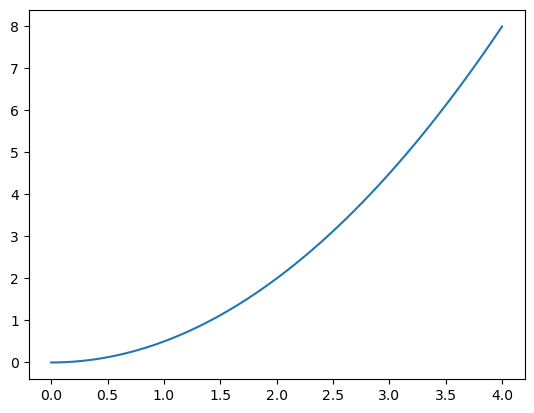

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x2974aecb0>

In [20]:
plot(x, U.(x))